In [43]:
import librosa
import librosa.display
from librosa.core import amplitude_to_db
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 18})

from IPython.display import Audio

import numpy as np
import scipy

import mir_eval

In [44]:
y, sr = librosa.load('data/Audio/Lab_1/scope_2.wav')

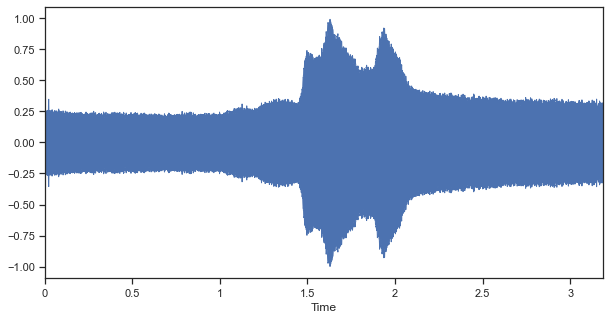

In [45]:
librosa.display.waveplot(y,sr)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


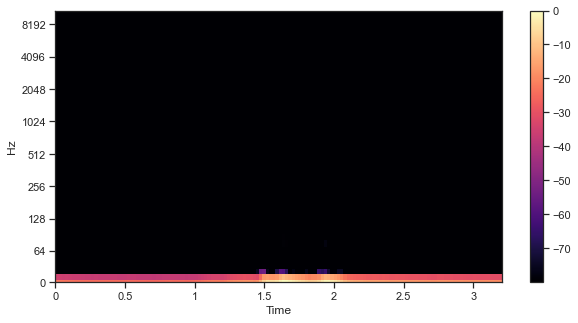

In [46]:
D = librosa.stft(y)

log_power = amplitude_to_db(D**2, ref=np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='log')
plt.colorbar()

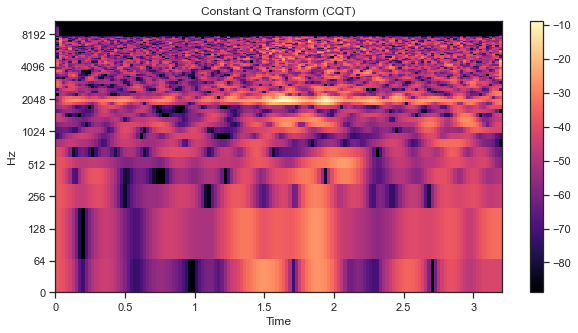

In [47]:
C = librosa.cqt(y,sr)

librosa.display.specshow(amplitude_to_db(C**2), x_axis='time', y_axis='log')
plt.title('Constant Q Transform (CQT)')
plt.colorbar()

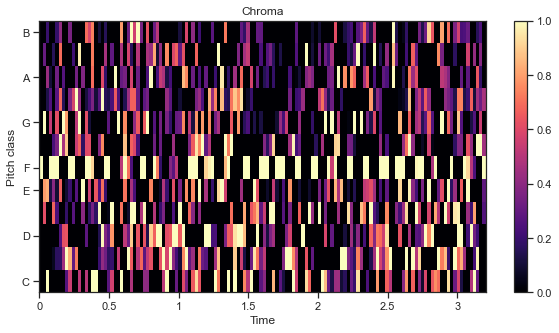

In [48]:
chroma = librosa.feature.chroma_cqt(C=C, sr=sr)
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')
plt.title('Chroma')
plt.colorbar()


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

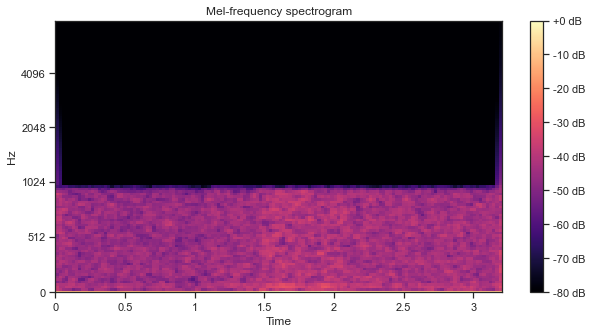

In [49]:
# Mel Spectra

librosa.feature.melspectrogram(y=y, sr=sr)
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)
# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'MFCC')]

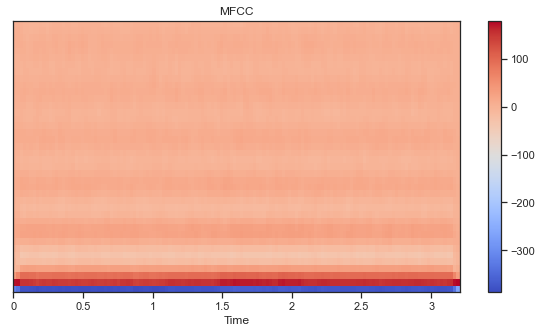

In [50]:
# Mel-frequency cepstral coefficients (MFCCs)

librosa.feature.mfcc(y=y, sr=sr)
librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                   fmax=8000)
librosa.feature.mfcc(S=librosa.power_to_db(S))
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

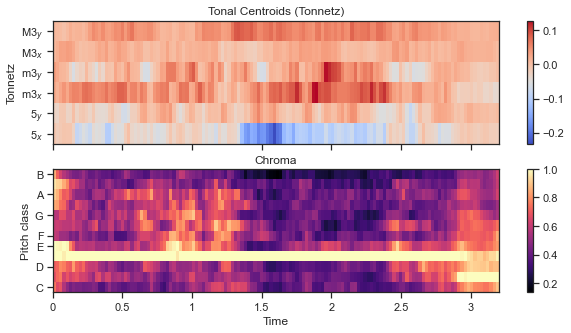

In [51]:
# Tonnetz
y = librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tonnetz,
                                y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()
img2 = librosa.display.specshow(librosa.feature.chroma_cqt(y, sr=sr),
                                y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])